# Data-driven modeling 2 - introduction to artificial neural networks

Lecturer: Dr.-Ing. Mauricio Fernández

## Contents of this lecture

[1. Short overview of artificial intelligence](#1.-Short-overview-of-artificial-intelligence-(AI))

[2. Introduction to artificial neural networks](#2.-Introduction-to-artificial-neural-networks-(ANN))

[3. How to build a basic tf.keras model](#3.-How-to-build-a-basic-tf.keras-model)

## 1. Short overview of artificial intelligence (AI)

Some definitions in the web:
- the theory and development of computer systems able to perform tasks normally requiring human intelligence, such as visual perception, speech recognition, decision-making, and translation between languages.
- study of "intelligent agents": any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals

<img src="https://images.theconversation.com/files/168081/original/file-20170505-21003-zbguhy.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=926&fit=clip" alt="neural netowork" width="300" align="right">

Computational methods in AI:
- Data mining
- Machine learning
    - Artificial neural networks (ANN)
        - Single layer learning
        - **Deep learning (DL)**
    - Kernel methods (SVM,...)
    - Decision trees
    - ...
- ...

## Why ANN?

Pros:
- Enourmous flexibility due to high number of parameters
- Capability to represent complex functions
- Huge range of applications (visual perception, decision-making, ...) in industry and research
- Open high-performance software (TensorFlow, Keras, PyTorch, Scikit-learn,...)

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" alt="Keras" width="200" align="right">
<img src="https://www.tensorflow.org/images/tf_logo_social.png" alt="TensoFlow" width="200" align="right">

Cons:
- Difficult to train (vanishing gradient,...)
- High number of internal parameters

## 2. Introduction to artificial neural networks (ANN)

Needed modules

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Neuron model

**Neuron:** single unit cell processing incoming electric signals (input)

<img src="https://images.theconversation.com/files/168081/original/file-20170505-21003-zbguhy.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=926&fit=clip" alt="neural netowork" width="200" align="left">
<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras+Python+Tutorial/content_content_neuron.png" alt="neuron" width="600" align="center">

**Mathematical model:** input $x$ with output $y$ and internal parameters $w$ (weight), $b$ (bias) and activation function $a(z)$
$$
\hat{y} = a(wx +b)
$$

**Example:**
$$
\hat{y} = \tanh(0.3x - 3)
$$

## Activation functions

$$ a(z) = a(w x + b) $$

In [2]:
z = np.linspace(-3, 3, 100)
fig_a = plt.figure()
plt.plot(z, tf.nn.relu(z), label='relu')
plt.plot(z, tf.nn.softplus(z), label='softplus')
plt.plot(z, tf.nn.tanh(z), label='tanh')
plt.plot(z, tf.nn.sigmoid(z), label='sigmoid')
plt.xlabel('$z$')
plt.ylabel('$a(z)$')
plt.legend()
plt.close()

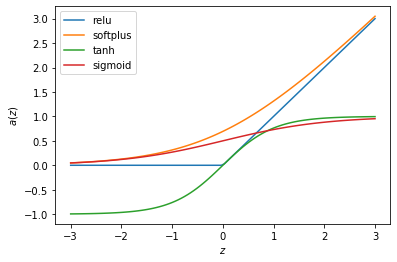

In [3]:
fig_a

## ANN architecture

**Example 1:** Two one-dimensional layers
$$
\hat{y} = a^{(2)}(w^{(2)}a^{(1)}(w^{(1)}x+b^{(1)})+b^{(2)})
$$

**Example 2:** Network for 2D input and 1D output with one hidden layer (3 neurons) and identity final activation 
$$
\hat{y} = 
\begin{pmatrix}
w^{(2)}_1 & w^{(2)}_2 & w^{(2)}_3
\end{pmatrix}
a^{(1)}
\left(
\begin{pmatrix}
w^{(1)}_{11} & w^{(1)}_{12} \\
w^{(1)}_{21} & w^{(1)}_{22} \\
w^{(1)}_{31} & w^{(1)}_{32} \\
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2
\end{pmatrix}
+
\begin{pmatrix}
b^{(1)}_1 \\ b^{(1)}_2 \\ b^{(1)}_3
\end{pmatrix}
\right)
+
b^{(2)}
$$

<img src="./files/figures/network1.png" alt="network1" width="300" align="center">

[Draw networks](http://alexlenail.me/NN-SVG/index.html)

## Deep networks

Lots of layers

<img src="./files/figures/network2.png" alt="network2" width="600" align="left">
<img src="https://images.theconversation.com/files/168081/original/file-20170505-21003-zbguhy.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=926&fit=clip" alt="neural network" width="200" align="right">

## Training an ANN

<img src="./files/figures/network2.png" alt="network2" width="400" align="right">

For input vector $x \in \mathbb{R}^3$ consider the network $\hat{y}(x) \in \mathbb{R}^2$ for the approximation of a vector function $y(x) \in \mathbb{R}^2$. After fixing the architecture of the network (number of layers, number of neurons and activation functions), the remaining parameters (weights and biases) need calibration. This is achieved in **supervised learning** through the minimization of an objective function (referred to as **loss**) for provided dataset $D$ with $N$ data pairs
$$
    D = \{(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),\dots,(x^{(N)},y^{(N)})\}
$$
which the ANN $\hat{y}(x)$ is required to approximate. 

Example loss: mean squared error (MSE) $e(y,\hat{y})$ for each data pair averaged over the complete dataset
$$
 L = \frac{1}{N} \sum_{i=1}^N e(y^{(i)}, \hat{y}^{(i)})
 \ , \quad
 e(y,\hat{y}) = \frac{1}{2}\sum_{j=1}^2(y_j-\hat{y}_j)^2
$$

The calibration of weights and biases based on the minimization of the loss for given data is referred to as **training**.

## Standard problems

**Regression:** fit a model $\hat{y}(x)$ to approximate a function $y(x)$.
* $x = 14.5$
* $y(x) = 3\sin(14.5)+10 = 12.8...$
* $\hat{y}(x) = 11.3...$

**Classification:** fit a model $\hat{y}(x)$ predicting that $x$ belongs to one of $C$ classes.
* $C=4$ classes $\{$cat,dog,horse,pig$\}$
* $x =$ image of a horse
* $y(x) = (0,0,1,0)$ (third class = horse)
* $\hat{y}(x) = (0.1,0.2,0.4,0.3)$ (class probabilities - model predicts for the third class the highest probability)

## 3. How to build a basic tf.keras model

<img src="./files/figures/network1.png" alt="network1" width="300" align="ceter">

In [4]:
# Create sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='relu', input_shape=[2]) 
    # 3x2 weights and 3 biases = 9 parameters
    ,tf.keras.layers.Dense(1)  
    # 1x3 weights and 1 bias = 4 parameters
])

In [5]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


<img src="./files/figures/network1.png" alt="network1" width="300" align="ceter">

In [6]:
# List of 3 points to be evaluated
xs = np.array([
    [0, 0], 
    [0, np.pi], 
    [np.pi, np.pi]
])

# Prediction / model evaluation
ys_model = model.predict(xs)
print(ys_model)

[[0.       ]
 [1.1679914]
 [1.6867402]]


$$ y = 3 \sin(x_1 + x_2) + 10 $$

In [7]:
# Data of function to be approximated (e.g., from measurements or simulations)
ys = 3*np.sin(np.sum(xs, axis=1, keepdims=True))+10

# Compile model: choose optimizer and loss
model.compile(optimizer='adam', loss='mse')

# Train
model.fit(xs, ys, epochs=100, verbose=0)

# Predict after training
ys_model = model.predict(xs)
print(xs)
print(ys)
print(ys_model)

[[0.         0.        ]
 [0.         3.14159265]
 [3.14159265 3.14159265]]
[[10.]
 [10.]
 [10.]]
[[0.2657419]
 [2.1094053]
 [3.2435544]]
